In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('labelled_data.csv')

In [3]:
df.head(5)

,Unnamed: 0,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0,0704.1394,Tarik Had\v{z}i\'c,"Tarik Hadzic, Rune Moller Jensen, Henrik Reif ...",Calculating Valid Domains for BDD-Based Intera...,NaN,NaN,NaN,NaN,cs.AI,NaN,In these notes we formally describe the func...,"[{'version': 'v1', 'created': 'Wed, 11 Apr 200...",2007-05-23,"[['Hadzic', 'Tarik', ''], ['Jensen', 'Rune Mol..."
1,1,0704.2010,Juliana Bernardes,"Juliana S Bernardes, Alberto Davila, Vitor San...",A study of structural properties on profiles HMMs,"6 pages, 7 figures",NaN,NaN,NaN,cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,Motivation: Profile hidden Markov Models (pH...,"[{'version': 'v1', 'created': 'Mon, 16 Apr 200...",2008-12-11,"[['Bernardes', 'Juliana S', ''], ['Davila', 'A..."
2,2,0704.2542,Joan Llobera,Joan Llobera,Narratives within immersive technologies,5 pages,NaN,NaN,NaN,cs.HC,NaN,The main goal of this project is to research...,"[{'version': 'v1', 'created': 'Thu, 19 Apr 200...",2007-05-23,"[['Llobera', 'Joan', '']]"
3,3,0704.3433,Tshilidzi Marwala,Tshilidzi Marwala and Bodie Crossingham,Bayesian approach to rough set,"20 pages, 3 figures",NaN,NaN,NaN,cs.AI,NaN,This paper proposes an approach to training ...,"[{'version': 'v1', 'created': 'Wed, 25 Apr 200...",2007-05-23,"[['Marwala', 'Tshilidzi', ''], ['Crossingham',..."
4,4,0704.3500,Jerome Darmont,"Zhen He, J\'er\^ome Darmont (ERIC)",Une plate-forme dynamique pour l'\'evaluation ...,20 pages,19\`emes Journ\'ees de Bases de Donn\'ees Avan...,NaN,NaN,cs.DB,NaN,In object-oriented or object-relational data...,"[{'version': 'v1', 'created': 'Thu, 26 Apr 200...",2007-05-23,"[['He', 'Zhen', '', 'ERIC'], ['Darmont', 'Jérô..."


In [4]:
df_cols = df[['title', 'abstract', 'categories']]

In [5]:
df_cols.shape

(20998, 3)

In [6]:
df_cols.head(5)

,title,abstract,categories
0,Calculating Valid Domains for BDD-Based Intera...,In these notes we formally describe the func...,cs.AI
1,A study of structural properties on profiles HMMs,Motivation: Profile hidden Markov Models (pH...,cs.AI
2,Narratives within immersive technologies,The main goal of this project is to research...,cs.HC
3,Bayesian approach to rough set,This paper proposes an approach to training ...,cs.AI
4,Une plate-forme dynamique pour l'\'evaluation ...,In object-oriented or object-relational data...,cs.DB


In [7]:
from sklearn.model_selection import train_test_split

df_sample1, df_sample2 = train_test_split(df_cols[['title', 'abstract', 'categories']], train_size = 0.75, stratify=df['categories'], random_state=42)

In [8]:
df_sample1.reset_index(inplace=True, drop=True)
df_sample2.reset_index(inplace=True, drop=True)

In [9]:
df_final = df_sample2

In [10]:
import nltk
nltk.download('wordnet', 'punkt')

[nltk_data] Downloading package wordnet to punkt...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
from re import sub, findall, I, MULTILINE
from nltk.tokenize import sent_tokenize

filter_chars = {'¥', '©', '¬', '®', '°', '±', '¼', 'Á', 'Å', 'Æ', 'Ç', 'É', 'Ñ', 'Ó', 'Ö', '×', 'ß', 'à', 'á', 'â', 'ã',
                'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'í',
                'î', 'ï', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'ú', 'ü', 'ý', 'ā', 'ą', 'ć', 'Č', 'č', 'ē', 'ĕ', 'ė', 'ě',
                'ğ', 'ħ', 'ı', 'ĺ', 'Ł', 'ł', 'ń', 'ņ',
                'ň', 'ō', 'Ř', 'І', 'В', 'С', 'ř', 'ś', 'Ş', 'ş', 'Š', 'š', 'ť', 'ū', 'ŭ', 'ů', 'ų', 'Ż', 'Ž', 'ž', 'ǧ',
                'ǫ', 'ș', 'ə', 'ˆ', 'ˇ', '˙', '˜', '́', '̂', '̃', '̄',
                '̈', 'Γ', 'Δ', 'Θ', 'Λ', 'Π', 'Σ', 'Φ', 'Χ', 'Ψ', 'Ω', 'α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'κ', 'λ',
                'μ', 'ν', 'ξ', 'π', 'ρ', 'σ', 'τ', 'υ',
                'φ', 'χ', 'ψ', 'ω', 'ϑ', 'ϕ', 'ϱ', 'ϵ', 'ḯ', '‖', '†', '…', '‰', '′', '″', '€', '⃖', '⃗', 'ℓ', 'ℜ', '™',
                '←', '↑', '→', '↓', '↦', '⇀', '⇒', '⇔',
                '⇢', '∀', '∂', '∃', '∅', '∆', '∇', '∈', '∉', '∏', '∑', '∘', '∙', '∝', '∞', '∠', '∣', '∥', '∧', '∨', '∩',
                '∪', '∫', '∭', '∼', '≃', '≅', '≈', '≔', '≜',
                '≠', '≡', '≤', '≥', '≪', '≫', '≲', '≳', '⊂', '⊆', '⊕', '⊖', '⊗', '⊙', '⋀', '⋁', '⋂', '⋃', '⋅', '⋆', '⋒',
                '⋮', '⋯', '⌊', '⌋', '□', '△', '▽', '♯',
                '✔', '➔', '⟶', '⟹', '⩽', '⩾', '⪰', '〈', '〉', '丙', '东', '作', '六', '务', '印', '厂', '合', '塘', '大',
                '子', '宁', '宅', '宝', '宫', '尚', '局',
                '峰', '府', '建', '承', '汪', '浦', '船', '药', '路', '辰', '铜', '食', '︷', '︸', '＋', '−', '{', '}',
                'ˆ', ':', '[', ']', '+', '=', '*', '<', '>', '^', '/', '-', '–', '&', '#'}


def preprocessed_text(txt: str, keep_parenthesis=False) -> str:
    # Remove links, if any
    txt = sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*', '', txt, flags=MULTILINE)

    # Remove references, if any
    txt = sub(r'\s\([A-Z][a-z]+,\s[A-Z][a-z]?\.[^\)]*,\s\d{4}\)', '', txt)

    # Replace multiple spaces with a single space
    txt = sub(r' +', ' ', txt, flags=I)

    # '. singlelowercasechar' -> '.singlelowercasechar'
    txt = sub(r'(?<=[\.])\s+(?=(?:[a-z|[0-9]))', '', txt)

    # Converting patterns: ab.a -> ab a,   b.1 -> b 1,   A.F -> A F,   word.something -> word something
    for pattern in findall(r'[a-zA-Z]\.[a-zA-Z0-9]', txt):
        txt = txt.replace(pattern, f"{pattern.split('.')[0]} {pattern.split('.')[1]}")

    if not keep_parenthesis:
        # Removing parenthesis
        final_txt = sub(r'\(.*?\)', ' ', txt)
        
        punctuation = "\"#$&\'()-/:;@[\\]_`~'“”´ʼ‘’{|}+*^=><−"

    else:
        # Removing parenthesis with no alpha numeric character except (abcijkmnpqrtxy)
        final_txt = sub(r'\(([0-9+-/*^><=&$#@%.,!{} abcijkmnpqrtxyABCIJKMNPQRTXY]*)\)', ' ', txt)
        
        punctuation = "\"#$&\'-/:;@\\_`~'“”´ʼ‘’{|}[]+*^=><−"

    # Removes punctuation
    final_txt = ''.join([c if c not in punctuation and c not in filter_chars else ' ' for c in final_txt])
    
    # Removing extra spaces
    final_txt = sub(r' +', ' ', final_txt, flags=I)

    return final_txt

In [12]:
# removing any character other than alphabets from the starting of a word

df_final['tidy_title'] = df_final['title'].str.replace('[^a-zA-Z]'," ", regex=True)

# converting the text to lowercase
df_final['tidy_title'] = df_final['tidy_title'].str.lower()

# running the code for necessary pre processing
df_final['tidy_title'] = np.vectorize(preprocessed_text)(df_final['tidy_title'])

In [13]:
# removing any character other than alphabets from the starting of a word

df_final['tidy_abstract'] = df_final['abstract'].str.replace('[^a-zA-Z]'," ", regex=True)

# converting the text to lowercase
df_final['tidy_abstract'] = df_final['tidy_abstract'].str.lower()

# running the code for necessary pre processing
df_final['tidy_abstract'] = np.vectorize(preprocessed_text)(df_final['tidy_abstract'])

In [14]:
df_final.head()

,title,abstract,categories,tidy_title,tidy_abstract
0,Real Time Reasoning in OWL2 for GDPR Compliance,This paper shows how knowledge representatio...,cs.AI,real time reasoning in owl for gdpr compliance,this paper shows how knowledge representation...
1,Features modeling with an $\alpha$-stable dist...,The aim of this paper is to show the interes...,cs.AI,features modeling with an alpha stable distrib...,the aim of this paper is to show the interest...
2,Evaluation of Information Retrieval Systems Us...,The interpretation of the experimental data ...,cs.IR,evaluation of information retrieval systems us...,the interpretation of the experimental data c...
3,"Cause, Responsibility, and Blame: oA Structura...",A definition of causality introduced by Halp...,cs.AI,cause responsibility and blame oa structural m...,a definition of causality introduced by halpe...
4,Know2Look: Commonsense Knowledge for Visual Se...,"With the rise in popularity of social media,...",cs.IR,know look commonsense knowledge for visual search,with the rise in popularity of social media i...


In [15]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# Peforming Lemmatization on title
from nltk.stem import WordNetLemmatizer

tokenized_title = df_final['tidy_title'].apply(lambda x: x.split())
  
lemmatizer = WordNetLemmatizer()
tokenized_title = tokenized_title.apply(lambda x:[lemmatizer.lemmatize(i) for i in x])

for i in range(len(tokenized_title)):
    tokenized_title[i] = " ".join(tokenized_title[i])
    
df_final['tidy_title'] = tokenized_title

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jaskaransingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jaskaransingh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
df_final.head(5)

,title,abstract,categories,tidy_title,tidy_abstract
0,Real Time Reasoning in OWL2 for GDPR Compliance,This paper shows how knowledge representatio...,cs.AI,real time reasoning in owl for gdpr compliance,this paper shows how knowledge representation...
1,Features modeling with an $\alpha$-stable dist...,The aim of this paper is to show the interes...,cs.AI,feature modeling with an alpha stable distribu...,the aim of this paper is to show the interest...
2,Evaluation of Information Retrieval Systems Us...,The interpretation of the experimental data ...,cs.IR,evaluation of information retrieval system usi...,the interpretation of the experimental data c...
3,"Cause, Responsibility, and Blame: oA Structura...",A definition of causality introduced by Halp...,cs.AI,cause responsibility and blame oa structural m...,a definition of causality introduced by halpe...
4,Know2Look: Commonsense Knowledge for Visual Se...,"With the rise in popularity of social media,...",cs.IR,know look commonsense knowledge for visual search,with the rise in popularity of social media i...


In [17]:
tokenized_abstract = df_final['tidy_abstract'].apply(lambda x: x.split())
  
lemmatizer = WordNetLemmatizer()
tokenized_abstract = tokenized_abstract.apply(lambda x:[lemmatizer.lemmatize(i) for i in x])

for i in range(len(tokenized_abstract)):
    tokenized_abstract[i] = " ".join(tokenized_abstract[i])
    
df_final['tidy_abstract'] = tokenized_abstract

In [18]:
df_final.head()

,title,abstract,categories,tidy_title,tidy_abstract
0,Real Time Reasoning in OWL2 for GDPR Compliance,This paper shows how knowledge representatio...,cs.AI,real time reasoning in owl for gdpr compliance,this paper show how knowledge representation a...
1,Features modeling with an $\alpha$-stable dist...,The aim of this paper is to show the interes...,cs.AI,feature modeling with an alpha stable distribu...,the aim of this paper is to show the interest ...
2,Evaluation of Information Retrieval Systems Us...,The interpretation of the experimental data ...,cs.IR,evaluation of information retrieval system usi...,the interpretation of the experimental data co...
3,"Cause, Responsibility, and Blame: oA Structura...",A definition of causality introduced by Halp...,cs.AI,cause responsibility and blame oa structural m...,a definition of causality introduced by halper...
4,Know2Look: Commonsense Knowledge for Visual Se...,"With the rise in popularity of social media,...",cs.IR,know look commonsense knowledge for visual search,with the rise in popularity of social medium i...


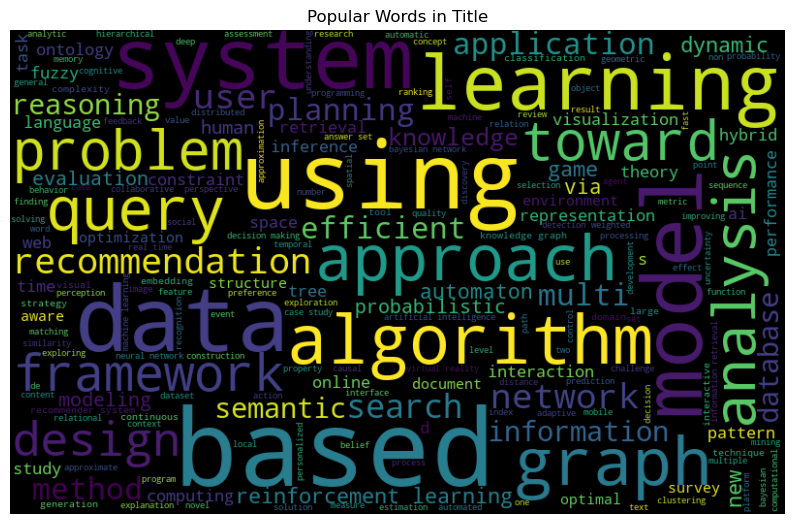

In [22]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df_final['tidy_title']])  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title("Popular Words in Title")
plt.axis('off') 
plt.show()

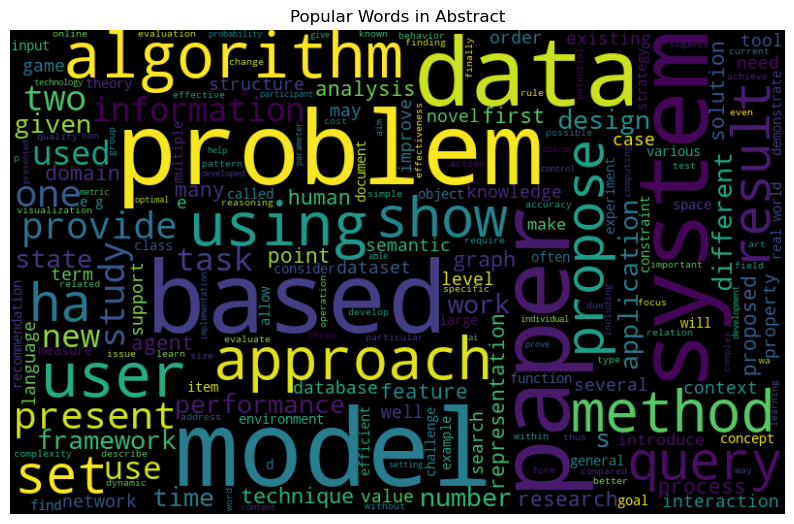

In [23]:
all_words = ' '.join([text for text in df_final['tidy_abstract']])  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Popular Words in Abstract")
plt.axis('off') 
plt.show()